# Exercícos Aula 5

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [43]:
img_lena = cv2.imread('lena.png')
img_folha = cv2.imread('imagem_folha.jpg')
img_unequalized = cv2.imread('unequalized.jpg')
img_aluno = cv2.imread('img_aluno.png')

In [44]:
def plot(*args):
    size = (np.ceil(np.sqrt(len(args)))).astype(np.uint8)
    fig, ax = plt.subplots(size, size)
    item = 0
    for line in range(size):
        for column in range(size):
            ax[line, column].imshow(cv2.cvtColor(args[item], cv2.COLOR_BGR2RGB))
            item += 1

    plt.show()

In [45]:
def plot_gray(*args):
    size = (np.ceil(np.sqrt(len(args)))).astype(np.uint8)
    fig, ax = plt.subplots(size, size)
    item = 0
    for line in range(size):
        for column in range(size):
            ax[line, column].imshow(args[item], cmap='gray')
            item += 1

    plt.show()

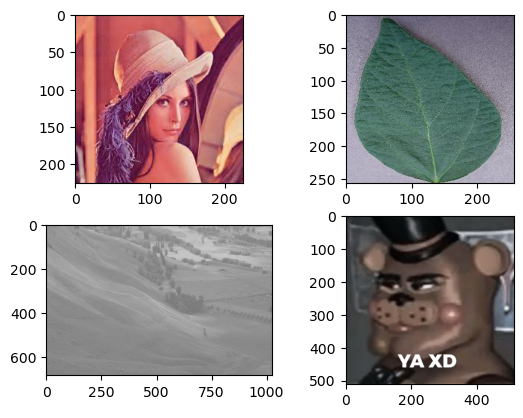

In [46]:
plot(img_lena, img_folha, img_unequalized, img_aluno)

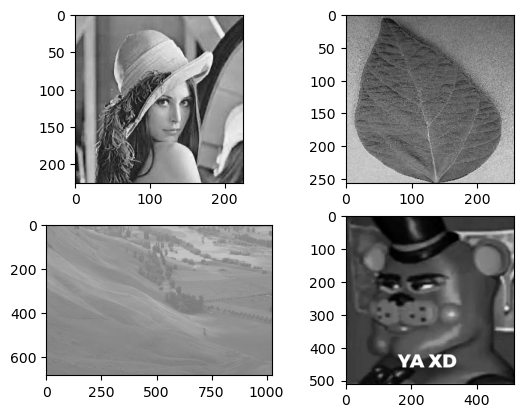

In [47]:
img_lena_gray = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
img_folha_gray = cv2.cvtColor(img_folha, cv2.COLOR_BGR2GRAY)
img_unequalized_gray = cv2.cvtColor(img_unequalized, cv2.COLOR_BGR2GRAY)
img_aluno_gray = cv2.cvtColor(img_aluno, cv2.COLOR_BGR2GRAY)

plot_gray(img_lena_gray, img_folha_gray, img_unequalized, img_aluno_gray)

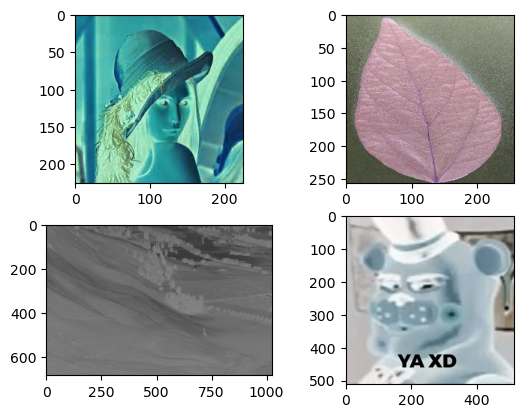

In [48]:
x = lambda img : 255 - img

img_lena_negative = x(img_lena)
img_folha_negative = x(img_folha)
img_unequalized_negative = x(img_unequalized)
img_aluno_negative = x(img_aluno)

plot(img_lena_negative, img_folha_negative, img_unequalized_negative, img_aluno_negative)

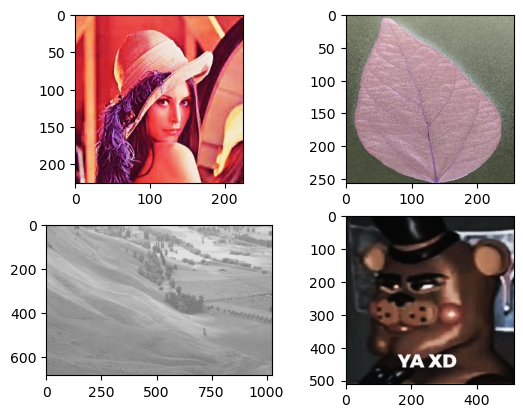

In [49]:
k = 0.03

x = lambda img : (255 / (1 + np.exp(-k * (img.astype(np.int32) - 127)))).astype(np.uint8)

img_lena_normalized = x(img_lena)
img_folha_normalized = x(img_folha)
img_unequalized_normalized = x(img_unequalized)
img_aluno_normalized = x(img_aluno)


plot(img_lena_normalized, img_folha_negative, img_unequalized_normalized, img_aluno_normalized)

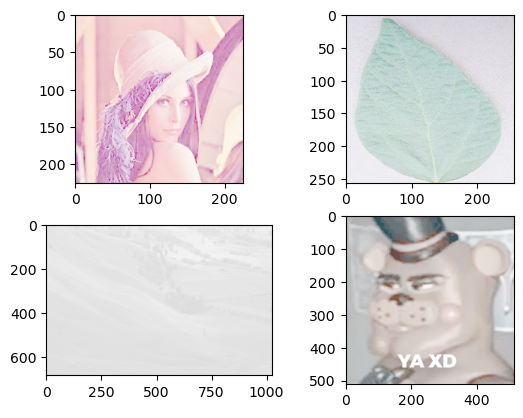

In [50]:
c_scale = 255 / np.log2(1+255)

x = lambda img : (c_scale * np.log2(1 + img.astype(np.int32))).astype(np.uint8)

img_lena_log = x(img_lena)
img_folha_log = x(img_folha)
img_unequalized_log = x(img_unequalized)
img_aluno_log = x(img_aluno)

fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(cv2.cvtColor(img_lena_log, cv2.COLOR_BGR2RGB))
ax[0, 1].imshow(cv2.cvtColor(img_folha_log, cv2.COLOR_BGR2RGB))
ax[1, 0].imshow(cv2.cvtColor(img_unequalized_log, cv2.COLOR_BGR2RGB))
ax[1, 1].imshow(cv2.cvtColor(img_aluno_log, cv2.COLOR_BGR2RGB))

plt.show()